# Tests on extremal Reissner Nordstrom black holes

Here we solve the scalar wave equation on ERN BH backgrounds with layers at both horizon and scri.

In [1]:
addpath('/home/sbishoyi_umassd_edu/phd_work/projects/aretakis_extremal_hair/codes/ERN_case/both_horizon_scri')
addpath('/home/sbishoyi_umassd_edu/phd_work/projects/aretakis_extremal_hair/codes/custom_codes')
addpath('/home/sbishoyi_umassd_edu/phd_work/projects/aretakis_extremal_hair/codes/conversion')
addpath('/home/sbishoyi_umassd_edu/phd_work/projects/aretakis_extremal_hair/codes/setup')

Globals1D;

first_order_reduction_type=2;

% Polynomial order used for approximation 
FinalTime = 2000; M=1; Q=M; a=0; ell = 0; 

N=10; xL = -20; xR = 1200; K = 350;

%disp(["The mode being solved is ",num2str(ell),",",num2str(m)])

[Nv, VX, K, EToV] = MeshGen1D(xL,xR,K);
StartUp1D;

xmin = min(abs(x(1,:)-x(2,:)))
dg_globals.xmin=xmin;

locR2=-10; locR1=150;

%[idx1,idx2]=find_value_arr(x,locR2);
[idx1,idx2]=find(abs(x-locR2)<1);
idx1=idx1(1); idx2=idx2(1);
locR2=x(idx1,idx2);


%[idx3,idx4]=find_value_arr(x,locR1);
[idx3,idx4]=find(abs(x-locR1)<1);
idx3=idx3(1); idx4=idx4(1);
locR1=x(idx3,idx4);

%F = (x+locR2)./(2*abs(x+locR2)) + (x-locR1)./(2*abs(x-locR1));
F = -homeHVSD(locR2 - x) + homeHVSD(x - locR1);
s2=xL; s1=xR;
P=4;


omega = 1  - ( ( (x-locR2)./(s2-locR2) ).^P).*homeHVSD(locR2-x)  - ( ( (x-locR1)./(s1-locR1) ).^P).*homeHVSD(x-locR1);

omegaP = (-1).*(((-1).*locR2+s2).^(-1).*((-1).*locR2+x)).^P.*0 ...
                +(-1).*P.*((-1).*locR2+s2)^(-1).*(((-1).*locR2+s2).^(-1) ...
                *((-1).*locR2+x)).^((-1)+P).*homeHVSD(locR2-x) ...
        + (-1).*(((-1).*locR1+s1).^(-1).*((-1).*locR1+x)).^P.*0 ...
                +(-1).*P.*((-1).*locR1+s1)^(-1).*(((-1).*locR1+s1).^(-1) ...
                *((-1).*locR1+x)).^((-1)+P).*homeHVSD(x-locR1);
                
ohm = omega.^2./(omega - x.*omegaP);

capH   = 1-ohm;

dg_globals.x=x;           dg_globals.Np=Np;        dg_globals.Nfp=Nfp; 
dg_globals.Nfaces=Nfaces; dg_globals.K=K;          dg_globals.vmapM=vmapM; 
dg_globals.vmapP=vmapP;   dg_globals.nx=nx;        dg_globals.rx=rx;
dg_globals.Dr=Dr;         dg_globals.LIFT=LIFT;    dg_globals.Fscale=Fscale;
dg_globals.rk4a=rk4a;     dg_globals.rk4b=rk4b;    dg_globals.rk4c=rk4c;
dg_globals.F=F;

rstar_adj = x./(omega); % need to prevent Inf at x(end,end)

%%%%%%%%%%%%%%%% Set conversion routines and potentials %%%%%%%%%%%%%%%%

r_ern=RstarToRwithCharge_Newton(rstar_adj,M); % -- changed on 12/22/23

%pot_sch=(1-2*M./r_sch).*(-2*M./(r_sch.^3) - ell*(ell+1)./r_sch.^2);


pot_ern=-(ell*(ell + 1)./r_ern.^4 + (2*M - 2*M^2./r_ern)./r_ern.^5).*...
     (r_ern.^2 -2*M.*r_ern + M^2); %-- checked on 12/22/23

Potential_eff = (1./((1-capH).*(1+capH))).*pot_ern;
Potential_eff(1,1)=double(0);
Potential_eff(end,end)=double(0);

Potential=Potential_eff;
phys_system.Potential=Potential;

%%%%%%%%%%%%%% Set initial condition for actual problem %%%%%%%%%%%%%%%%%%%


%sigma=3.2605; muu=-2.7233 ;% --> in 'x' that is rho coordinate -- no support on H.
sigma=5.0; muu=-5.0;

%%% Below is static IC
psi_in = (1/sqrt(2*pi*sigma^2))*exp(-(x-muu).^2/(2*sigma^2));
pi_in = zeros(Np,K);
phi_in = (1/sqrt(2*pi*sigma^2))*exp(-(x-muu).^2/(2*sigma^2)).*(-2*(x-muu)./(2*sigma^2)).*ohm; % --> the factor of 'ohm' is necessary.

%%% Below is generic IC type 1
%psi_in = (1/sqrt(2*pi*sigma^2))*exp(-(x-muu).^2/(2*sigma^2));
%pi_in = -(1/sqrt(2*pi*sigma^2))*exp(-(x-muu).^2/(2*sigma^2)).*(-2*(x-muu)./(2*sigma^2)); 
%phi_in = (1/sqrt(2*pi*sigma^2))*exp(-(x-muu).^2/(2*sigma^2)).*(-2*(x-muu)./(2*sigma^2)); % --> correction made on 1/2/2024 (Am).

%%% Below is generic IC type 2
%psi_in = 0*(1/sqrt(2*pi*sigma^2))*exp(-(x-muu).^2/(2*sigma^2));
%pi_in = (1/sqrt(2*pi*sigma^2))*exp(-(x-muu).^2/(2*sigma^2));
%phi_in = 0*-pi_in;

%%%%%%%%%%%%%%%%% Initial conditions in r_ern coordinates %%%%%%%%%%%%%%%%%

%sigma=0.16; muu=1.05;  %--> in r_ern coordinates for support on Horizon.
% psi_in = (1/sqrt(2*pi*sigma^2))*exp(-(r_ern-muu).^2/(2*sigma^2));
% pi_in = (1/sqrt(2*pi*sigma^2))*exp(-(r_ern-muu).^2/(2*sigma^2));
% pi_in = zeros(Np,K);
% phi_in = (1/sqrt(2*pi*sigma^2))*exp(-(r_ern-muu).^2/(2*sigma^2)).*(-2*(x-muu)./(2*sigma^2)); 

init_con.psi=psi_in;     init_con.pi=pi_in;        init_con.phi=phi_in;
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% physical system %%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
phys_system.ell=ell;        
% phys_system.pot=pot;
phys_system.omega=omega;
phys_system.omegaP=omegaP;
phys_system.ohm=ohm;
phys_system.capH=capH;
%phys_system.capHP=capHP;
phys_system.first_order_reduction_type = first_order_reduction_type;
phys_system.ell=ell;
%phys_system.m=m;
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

matF=1;
dg_globals.matF=matF;
dg_globals.rstar_adj=rstar_adj;

% Solve Problem

[psiarr,piarr,phiarr,tarr] = Wave1D_ERN_bhs(init_con,dg_globals,phys_system,FinalTime);

tarr=cell2mat(tarr);
psiarr=psiarr(~cellfun(@isempty, psiarr));
piarr=piarr(~cellfun(@isempty, piarr));
phiarr=phiarr(~cellfun(@isempty, phiarr));

xmin = 0.1150

xmin = 0.11502608 dt = 0.0104
5.0003% completed  | Program time: 100 | Elapsed clock(m) : 0.11602 | Estimated Time Remaining : 2.2043
10.0001% completed  | Program time: 200 | Elapsed clock(m) : 0.19266 | Estimated Time Remaining : 1.7339
15.0004% completed  | Program time: 300 | Elapsed clock(m) : 0.26935 | Estimated Time Remaining : 1.5262
20.0002% completed  | Program time: 400 | Elapsed clock(m) : 0.34595 | Estimated Time Remaining : 1.3838
25.0005% completed  | Program time: 500 | Elapsed clock(m) : 0.4227 | Estimated Time Remaining : 1.2681
30.0003% completed  | Program time: 600 | Elapsed clock(m) : 0.49909 | Estimated Time Remaining : 1.1645
35.0001% completed  | Program time: 700 | Elapsed clock(m) : 0.57552 | Estimated Time Remaining : 1.0688
40.0004% completed  | Program time: 800 | Elapsed clock(m) : 0.65207 | Estimated Time Remaining : 0.97808
45.0002% completed  | Program time: 900 | Elapsed clock(m) : 0.72839 | Estimated Time Remaining : 0.89025
50.0005% completed  | Pro

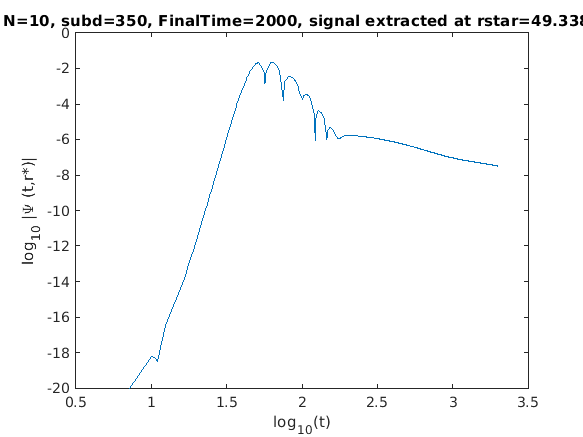

locR2 = -10.7703

locR1 = 149.0571

ans = 2002

In [19]:
psi_extr={};
extr_posn=50;
[r,c]=find(abs(x-extr_posn)<=1);
for i=1:length(tarr)
   psi_t=cell2mat(psiarr(i));
   psi=psi_t(r(1),c(1));
   psi_extr=[psi_extr,psi];
%    hold on
end
psi_extr=cell2mat(psi_extr);
% x_100=x;
h=figure;
plot(log10(tarr(4:end)),log10(abs(psi_extr(4:end))));
ylim([-20,0])
% plot properties
ylabel("log_{10} |\Psi (t,r*)|");
xlabel("log_{10}(t)")
t=sprintf("N=%d, subd=%d, FinalTime=%d, signal extracted at rstar=%1.4f",N,K,FinalTime,x(r(1),c(1)));
title(t)
%loc=strcat('plots/',t,'.png');
set(h,'Name' ,t);
locR2
locR1
length(tarr)

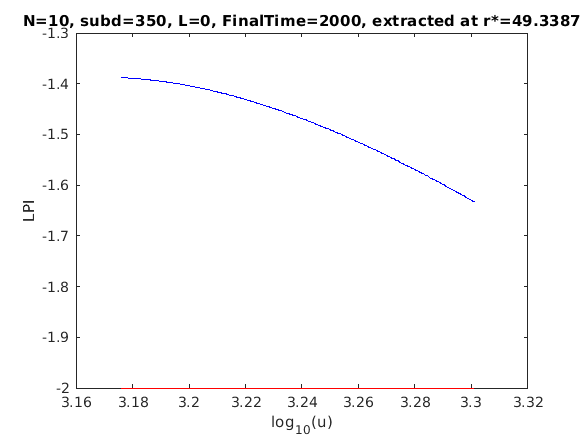

In [21]:
init1 = 1500;

%%% We can try log10 or just log... lets make things systematic.
logpsi1 = log10(abs(psi_extr(init1:end)));
%psi_extr_tail = psi_extr(init1:end);

%%% The following are the time arrays.
logt1 = log10(tarr(init1:end));
%tarr_tail = tarr(init1:end)-s;
%logt1 = log10(abs(tarr(init1:end)-s)/M);


%%% Now, we calculate the slope

%%% This is dlog(psi)dlog(tau).
slopepsi = (logpsi1(2:end)-logpsi1(1:end-1))./(logt1(2:end)-logt1(1:end-1));
%%% This is tau.\dot{psi}/psi.

tail=figure;
plot(log10(tarr(init1+1:end)),slopepsi,"Color",'b','LineStyle','-')
hold on
plot(log10(tarr(init1+1:end)),-2*ones(length(tarr(init1+1:end))),"Color",'r','LineStyle','-')

%ylim([-5.0,-1.95])
%yticks([-2.10 -2.05 -2.00 -1.95 -1.90])
%ticks = linspace(-5.0,-1.95,10);
%yticks(ticks)
ylabel('LPI')
%ylabel("C2/C1");
xlabel("log_{10}(u)")
tit=sprintf("N=%d, subd=%d, L=%d, FinalTime=%d, extracted at r*=%1.4f",N,K,ell,FinalTime,x(r(1),c(1)));
title(tit)
set(tail,'Name' ,tit);
%loc=strcat('plots/',t,'.png');
hold off


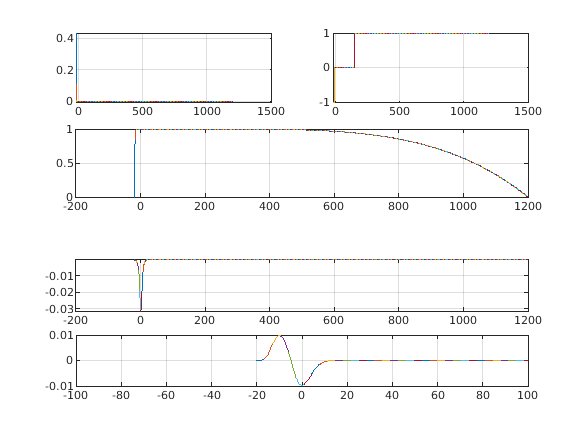

In [16]:
plot(x,F)
grid()

In [ ]:
plot(x,omega)
grid()

In [ ]:
plot(x,omegaP)
grid()

In [ ]:
plot(x,ohm)
grid()

In [ ]:
plot(x,capH)
grid()

In [ ]:
plot(x,rstar_adj)
grid()

In [ ]:
plot(x,pot_ern)
grid()


In [ ]:
plot(x,psi_in)
grid()

In [2]:
plot(x,r_ern)
grid()

ans = '/home/sbishoyi_umassd_edu'

In [ ]:

plot(x,Potential)
grid()

plot(x,phi_in)
grid()
xlim([-100,100])
